Filename: /mnt/c/Users/User/Downloads/ch2_xsm_20240212_v1/xsm/data/2024/02/12/calibrated/ch2_xsm_20240212_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   35798R x 4C   [D, E, E, E]   
None


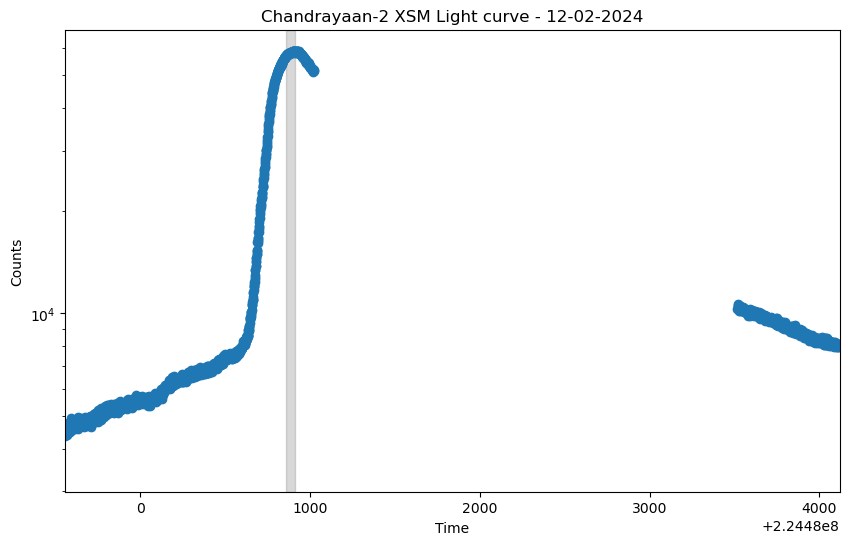

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits


#Opening fits file
file=fits.open("/mnt/c/Users/User/Downloads/ch2_xsm_20240212_v1/xsm/data/2024/02/12/calibrated/ch2_xsm_20240212_v1_level2.lc")
print(file.info())
#extracting data
data=file[1].data

#print(file[1].header)
time = data['TIME']
counts = data['RATE']
#plotting
plt.figure(figsize=(10, 6))
plt.plot(time, counts,'o', label='XSM light curve')
plt.axvspan(224480860.216564,224480910.216564,color='grey',alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Counts')
plt.yscale('log')
plt.xlim(224479553.216564,224484120.216564)
plt.title('Chandrayaan-2 XSM Light curve - 12-02-2024')
plt.show()



In [31]:
import numpy as np
import matplotlib.pyplot as plt
import xspec
from xspec import AllModels, AllData, Fit, Plot


basepathmod = '/mnt/c/Users/User/Downloads/chspec-main/'
AllModels.lmod('chspec', dirPath=basepathmod)
print("Model package chisoth successfully loaded.")

# Load the data file 
data_file = "/mnt/c/Users/User/Downloads/ch2_xsm_20240212_9_spec.pha" #30sec
AllData(f"{data_file}{{1}}")

# Ignoring channels outside 2.8 to 12.0 keV range
AllData.ignore("**:**-2.8 12.0-**")

# Defining the chisoth model
AllModels.clear()
model = xspec.Model("chisoth")


model(1).frozen = False   # Temperature
model(18).frozen = False  # Ar Abundance
model(20).frozen = False  #Ca Abundance
model(26).frozen = False  # Fe Abundance
model(28).frozen = False #Ni Abundance
# Perform the fit
Fit.perform()

# Extract the required parameters
temperature = model(1).values[0]  # Temperature 
emission_measure = model(31).values[0]  #Emission Measure 
fe_abundance = model(26).values[0] 
ca_abundance = model(20).values[0]  
ar_abundance = model(18).values[0] 
Ni_abundance = model(28).values[0]



Model package chisoth successfully loaded.Model package chspec successfully loaded.


Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: /mnt/c/Users/User/Downloads/ch2_xsm_20240212_9_spec.pha{1}  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.297e+04 +/- 2.796e+02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-512
  Telescope: CH-2_ORBITER Instrument: CH2_XSM  Channel Type: PI
  Exposure Time: 20 sec
 Using fit statistic: chi
 Using Response (RMF) File            /home/soumya/xsmdas_directory/xsmdas/caldb/CH2xsmresponse20200423v01.rmf for Source 1


Fit statistic  : Chi-Squared              1.012768e+10     using 512 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared              1.012768e+10     using 512 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.00

***Error: Requested ARF extension not found in ch2_xsm_20240212_9_spec.arf



Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      frozen
   4    1   chisoth    Be                  1.94000      frozen
   5    1   chisoth    B                   3.09000      frozen
   6    1   chisoth    C                   8.59000      frozen
   7    1   chisoth    N                   8.00000      frozen
   8    1   chisoth    O                   8.89000      frozen
   9    1   chisoth    F                   4.56000      frozen
  10    1   chisoth    Ne                  8.08000      frozen
  11    1   chisoth    Na                  6.93000      frozen
  12    1   chisoth    Mg                  8.15000      frozen
  13    1   chisoth    Al                  7.04000      frozen
  14    1   chisoth    Si                  8.10000      frozen
  

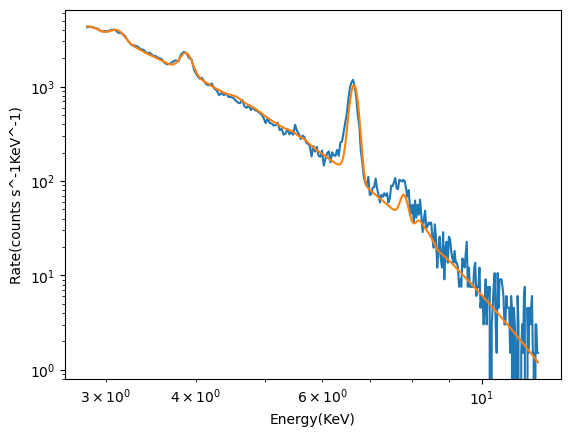

Temperature (MK): 15981787.422438573
Emission Measure: 3.7941722864413534
Iron (Fe) Abundance: 7.952840437626597
Calcium (Ca) Abundance: 6.779895718336927
Argon (Ar) Abundance: 6.355920089938369
Nickel (Ni) Abundance: 7.845938960406901


In [32]:
ene = Plot.x()        # Energy array
spec = Plot.y()       # Spectrum data (observed counts)
model = Plot.model()  # Model data (fitted counts)

plt.plot(ene,spec)
plt.plot(ene,model)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy(KeV)')
plt.ylabel('Rate(counts s^-1 KeV^-1')
plt.show()
print(f"Temperature (MK): {10**temperature}")
print(f"Emission Measure: {emission_measure}")
print(f"Iron (Fe) Abundance: {fe_abundance}")
print(f"Calcium (Ca) Abundance: {ca_abundance}")
print(f"Argon (Ar) Abundance: {ar_abundance}")
print(f"Nickel (Ni) Abundance: {Ni_abundance}")



Filename: /mnt/c/Users/User/Downloads/ch2_xsm_20240212_v1/xsm/data/2024/02/12/calibrated/ch2_xsm_20240212_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   35798R x 4C   [D, E, E, E]   
None


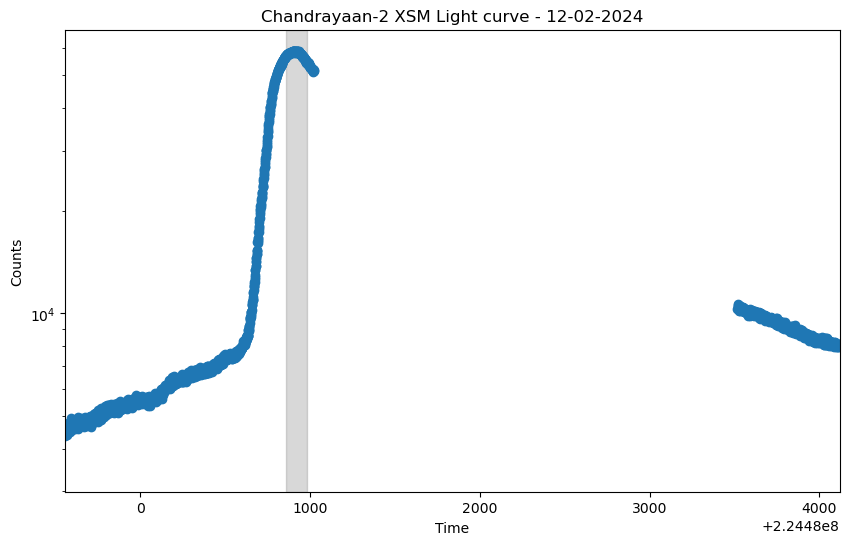

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits


#Opening fits file
file=fits.open("/mnt/c/Users/User/Downloads/ch2_xsm_20240212_v1/xsm/data/2024/02/12/calibrated/ch2_xsm_20240212_v1_level2.lc")
print(file.info())
#extracting data
data=file[1].data

#print(file[1].header)
time = data['TIME']
counts = data['RATE']
#plotting
plt.figure(figsize=(10, 6))
plt.plot(time, counts,'o', label='XSM light curve')
plt.axvspan(224480860.216564,224480980.216564,color='grey',alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Counts')
plt.yscale('log')
plt.xlim(224479553.216564,224484120.216564)
plt.title('Chandrayaan-2 XSM Light curve - 12-02-2024')
plt.show()


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import xspec
from xspec import AllModels, AllData, Fit, Plot


basepathmod = '/mnt/c/Users/User/Downloads/chspec-main/'
AllModels.lmod('chspec', dirPath=basepathmod)
print("Model package chisoth successfully loaded.")

# Load the data file 
data_file = "/mnt/c/Users/User/Downloads/ch2_xsm_20240212_8_spec.pha" # 2min
AllData(f"{data_file}{{1}}")

# Ignoring channels outside 2.8 to 12.0 keV range
AllData.ignore("**:**-2.8 12.0-**")

# Defining chisoth model
AllModels.clear()
model = xspec.Model("chisoth")


model(1).frozen = False   # Temperature
model(18).frozen = False  # Ar Abundance
model(20).frozen = False  #Ca Abundance
model(26).frozen = False # Fe Abundance
model(28).frozen = False #Ni Abundance
# Perform the fit
Fit.perform()

# Extracting  required parameters
temperature = model(1).values[0]  #Temperature 
emission_measure = model(31).values[0]  #Emission Measure 
fe_abundance = model(26).values[0]  
ca_abundance = model(20).values[0]  
ar_abundance = model(18).values[0]  
Ni_abundance = model(28).values[0]



Model package chisoth successfully loaded.
Model package chspec successfully loaded.

Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: /mnt/c/Users/User/Downloads/ch2_xsm_20240212_8_spec.pha{1}  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.191e+04 +/- 2.742e+02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-512
  Telescope: CH-2_ORBITER Instrument: CH2_XSM  Channel Type: PI
  Exposure Time: 120 sec
 Using fit statistic: chi
 Using Response (RMF) File            /home/soumya/xsmdas_directory/xsmdas/caldb/CH2xsmresponse20200423v01.rmf for Source 1


Fit statistic  : Chi-Squared              5.404095e+11     using 512 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared              5.404095e+11     using 512 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.0

***Error: Requested ARF extension not found in ch2_xsm_20240212_8_spec.arf



Fit statistic  : Chi-Squared                171224.5     using 278 bins.

Test statistic : Chi-Squared                171224.5     using 278 bins.
 Null hypothesis probability of 0.0e+00 with 272 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl        1:logT         18:Ar         20:Ca         26:Fe         28:Ni       31:norm
134587       20363         0       6.39184       5.26063       4.65512       8.07399       6.30555       29143.1
134481       15150.1       0       6.39356       4.24295       4.17755       8.00729       6.21119       28564.4
134392       10207.7       0       6.39516       4.05820       3.97929       7.89013       6.20323       27915.6
134297       7320.4        0       6.39670       4.02181       3.81565       7.71039       6.20067       27234.5
134197       5349.17       0       6.39820       4.00934       3.80510       7.41485       6.20031       26536.9
134111       3795.32   

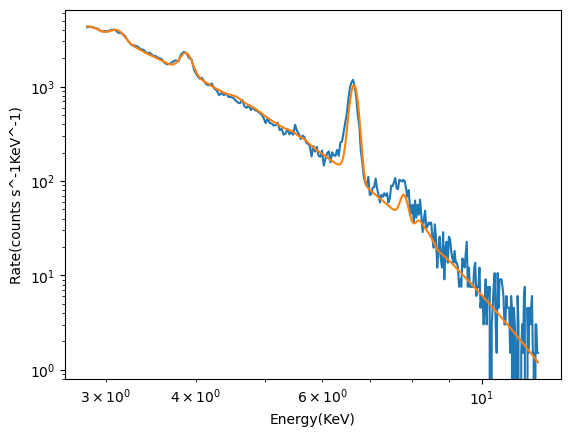

Temperature (MK): 16143162.11254171
Emission Measure: 3.6092348761240545
Iron (Fe) Abundance: 7.867121478754499
Calcium (Ca) Abundance: 6.749596226160058
Argon (Ar) Abundance: 6.474327163143005
Nickel (Ni) Abundance: 7.713605125285495


In [34]:
ene = Plot.x()        
spec = Plot.y()       
model = Plot.model()  

plt.plot(ene,spec)
plt.plot(ene,model)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy(KeV)')
plt.ylabel('Rate(counts s^-1KeV^-1)')
plt.show()
print(f"Temperature (MK): {10**temperature}")
print(f"Emission Measure: {emission_measure}")
print(f"Iron (Fe) Abundance: {fe_abundance}")
print(f"Calcium (Ca) Abundance: {ca_abundance}")
print(f"Argon (Ar) Abundance: {ar_abundance}")
print(f"Nickel (Ni) Abundance: {Ni_abundance}")

